## NLP

In [30]:
import tensorflow as tf



!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-01-26 11:04:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-26 11:04:50 (78.3 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [31]:
import helper_functions as hlp

In [32]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-01-26 11:04:51--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.207, 142.250.125.207, 142.250.136.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2024-01-26 11:04:51 (153 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [33]:
hlp.unzip_data('nlp_getting_started.zip')

In [34]:
# Visualize text data !!

import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [35]:
train_df_shuffled = train_df.sample(frac=1,random_state=42)

train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [36]:
# Visualize our text data :D

labels = ['Non disaster','disaster']
for index,text,target in train_df_shuffled.sample(5)[['text','target']].itertuples():
  print(f'{labels[target]}\n{text}\n\n')

Non disaster
@ZachLowe_NBA there are a few reasons for that but one of them is the constant Drake inundation.  Extremely annoying.  If Drake lands us a


disaster
Udhampur terror attack: Militants attack police post 2 SPOs injured: Suspected militants tonight attacked a p... http://t.co/FPhFESemyJ


Non disaster
@Calum5SOS I need to stop doing this to myself???? @s_casualty


disaster
Wildfire Burns On California U.s. China Economic Net Û_ : http://t.co/U2dO2mC2ri  http://t.co/3oM3xw6CZ8


disaster
Refugio oil spill may have been costlier bigger than projected http://t.co/7L6bHeXIXv | https://t.co/eMOSrMUvQa




In [37]:
from sklearn.model_selection import train_test_split

X = train_df_shuffled['text'].to_numpy()
y = train_df_shuffled['target'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Tokinaization !

In [38]:
# Creating the vobac of size 10000 manually !!!

from collections import Counter

arr = []
for text in X_train:
  arr.extend(text.split())


values_count = dict(Counter(arr))
values_count = pd.DataFrame({
    'word': values_count.keys(),
    'count': values_count.values()
})

vocab = values_count.sort_values('count',ascending=False).reset_index(drop=True)[:10000]
vocab


,word,count
0,the,2359
1,a,1656
2,to,1622
3,in,1581
4,of,1555
...,...,...
9995,SAHIB,1
9996,Electrocuted,1
9997,SAHIB:,1
9998,electr...,1


<Axes: ylabel='Frequency'>

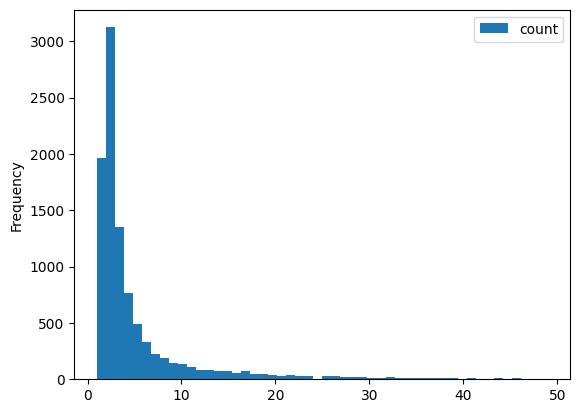

In [39]:
vocab[['count']][(vocab[['count']]<50)].plot.hist(bins=50)

In [40]:
import numpy as np
np.array([len(i.split()) for i in X_train]).mean()

14.901036345059115

In [41]:

text_vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000, #if outside on token voc will replace tokin with <OOV> out of voc
                                                                               standardize='lower_and_strip_punctuation',
                                                                               split='whitespace',
                                                                               ngrams=None, # Make a group of n words
                                                                               output_mode='int', # How to map tokenz into numbers
                                                                               output_sequence_length = 10, # if None length equal to length of largest training sample..
                                                                               pad_to_max_tokens = False)

text_vectorizer.adapt(X_train)



In [42]:
sample_text = "there's a flood in my street!"
print(sample_text)
text_vectorizer([sample_text])

there's a flood in my street!


<tf.Tensor: shape=(1, 10), dtype=int64, numpy=array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0]])>

### Embedding !!

In [43]:
embedding = tf.keras.layers.Embedding(input_dim=10000, # same as vocabolary size
                                      output_dim = 128,
                                      input_length= 10 # How long each input
                                      )


In [44]:
embedding(text_vectorizer([X[0]]))

<tf.Tensor: shape=(1, 10, 128), dtype=float32, numpy=
array([[[ 0.03622519, -0.03258227,  0.00268725, ..., -0.02563161,
         -0.03621142, -0.04858364],
        [ 0.00785338,  0.04634884,  0.01356197, ..., -0.04331946,
          0.02787825,  0.00413143],
        [ 0.01151016,  0.01231118,  0.00491732, ..., -0.0050966 ,
         -0.04380012,  0.04566245],
        ...,
        [ 0.04431139, -0.03777505,  0.01040529, ...,  0.03978917,
          0.01410602, -0.0012937 ],
        [ 0.0111152 , -0.02863989, -0.03818476, ...,  0.02276595,
         -0.01387655,  0.01378861],
        [ 0.02702286,  0.03242195, -0.00592231, ...,  0.04289088,
          0.03318829,  0.02785764]]], dtype=float32)>

In [45]:
embedding(text_vectorizer(X_train)).shape

TensorShape([6851, 10, 128])

In [46]:
text_vectorizer(X_train).shape

TensorShape([6851, 10])

In [47]:
X_train_vectorized = embedding(text_vectorizer(X_train))
# X_train_vectorized_flatten = tf.reshape(X_train_vectorized,shape=(X_train_vectorized.shape[0],-1))
X_train_vectorized_flatten = text_vectorizer(X_train)

X_test_vectorized = embedding(text_vectorizer(X_test))
# X_test_vectorized_flatten = tf.reshape(X_test_vectorized,shape=(X_test_vectorized.shape[0],-1))
X_test_vectorized_flatten = text_vectorizer(X_test)

## Models (Test Classification)

### Random forest, Naive Bayes

In [48]:
# Random Forest with TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


vectorizer = TfidfVectorizer()

X_train_vectorized_TFidf = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized_TFidf = vectorizer.transform(X_test).toarray()


model_0 = RandomForestClassifier()

model_0.fit(X_train_vectorized_TFidf,y_train)
predictions = model_0.predict(X_test_vectorized_TFidf)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.93      0.81       414
           1       0.87      0.58      0.70       348

    accuracy                           0.77       762
   macro avg       0.80      0.76      0.76       762
weighted avg       0.79      0.77      0.76       762

[[384  30]
 [145 203]]


In [49]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

model_00 = MultinomialNB()

model_00.fit(X_train_vectorized_TFidf,y_train)
predictions = model_00.predict(X_test_vectorized_TFidf)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762

[[386  28]
 [130 218]]


### Traditional NN

In [50]:
embedding(text_vectorizer(['hello']))

<tf.Tensor: shape=(1, 10, 128), dtype=float32, numpy=
array([[[-0.00294392,  0.01712425,  0.00450368, ...,  0.01158799,
         -0.04502733, -0.02948659],
        [ 0.03533825, -0.00114501,  0.01856271, ...,  0.04892525,
          0.00844435, -0.02191135],
        [ 0.03533825, -0.00114501,  0.01856271, ...,  0.04892525,
          0.00844435, -0.02191135],
        ...,
        [ 0.03533825, -0.00114501,  0.01856271, ...,  0.04892525,
          0.00844435, -0.02191135],
        [ 0.03533825, -0.00114501,  0.01856271, ...,  0.04892525,
          0.00844435, -0.02191135],
        [ 0.03533825, -0.00114501,  0.01856271, ...,  0.04892525,
          0.00844435, -0.02191135]]], dtype=float32)>

In [51]:

input = tf.keras.layers.Input((1,),dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
# x = tf.keras.layers.Flatten()(x)   # Global Avg pooling performed better !!
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(50,activation='relu')(x)
x = tf.keras.layers.Dense(50,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_1 = tf.keras.models.Model(input,output)
model_1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

model_1.fit(X_train,y_train,epochs=1,
            validation_data=(X_test,y_test))


Epoch 1/10
215/215 [==============================] - 8s 30ms/step - loss: 0.5448 - accuracy: 0.7205 - val_loss: 0.4838 - val_accuracy: 0.7756
Epoch 2/10
215/215 [==============================] - 10s 44ms/step - loss: 0.3383 - accuracy: 0.8609 - val_loss: 0.5047 - val_accuracy: 0.7664
Epoch 3/10
215/215 [==============================] - 11s 52ms/step - loss: 0.2305 - accuracy: 0.9127 - val_loss: 0.5775 - val_accuracy: 0.7598
Epoch 4/10
215/215 [==============================] - 16s 74ms/step - loss: 0.1613 - accuracy: 0.9364 - val_loss: 0.7453 - val_accuracy: 0.7677
Epoch 5/10
215/215 [==============================] - 6s 28ms/step - loss: 0.1154 - accuracy: 0.9504 - val_loss: 0.8880 - val_accuracy: 0.7520
Epoch 6/10
215/215 [==============================] - 7s 31ms/step - loss: 0.0911 - accuracy: 0.9555 - val_loss: 1.0769 - val_accuracy: 0.7480
Epoch 7/10
215/215 [==============================] - 5s 25ms/step - loss: 0.0764 - accuracy: 0.9619 - val_loss: 1.2147 - val_accuracy: 0.7

In [52]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 10, 128)           1280000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 50)                6450      
                                                                 
 dense_7 (Dense)             (None, 50)                2550

In [53]:
predictions = model_1.predict(X_test)
predictions = tf.reshape(predictions,(predictions.shape[0])).numpy()
print(classification_report(y_test,np.round(predictions)))
print(confusion_matrix(y_test,np.round(predictions)))

24/24 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       414
           1       0.71      0.70      0.71       348

    accuracy                           0.73       762
   macro avg       0.73      0.73      0.73       762
weighted avg       0.73      0.73      0.73       762

[[314 100]
 [103 245]]


In [54]:
print('%',model_1.predict(['my young brother loves toy cars'],verbose=0)[0][0]*1000//1/10)

% 89.0


In [55]:
embedding(text_vectorizer(['hello']))

<tf.Tensor: shape=(1, 10, 128), dtype=float32, numpy=
array([[[-0.02081699,  0.04304214, -0.01091111, ...,  0.0292802 ,
         -0.028917  , -0.06014417],
        [ 0.02731986,  0.01032973,  0.02118909, ...,  0.04890683,
          0.00125785, -0.01054836],
        [ 0.02731986,  0.01032973,  0.02118909, ...,  0.04890683,
          0.00125785, -0.01054836],
        ...,
        [ 0.02731986,  0.01032973,  0.02118909, ...,  0.04890683,
          0.00125785, -0.01054836],
        [ 0.02731986,  0.01032973,  0.02118909, ...,  0.04890683,
          0.00125785, -0.01054836],
        [ 0.02731986,  0.01032973,  0.02118909, ...,  0.04890683,
          0.00125785, -0.01054836]]], dtype=float32)>

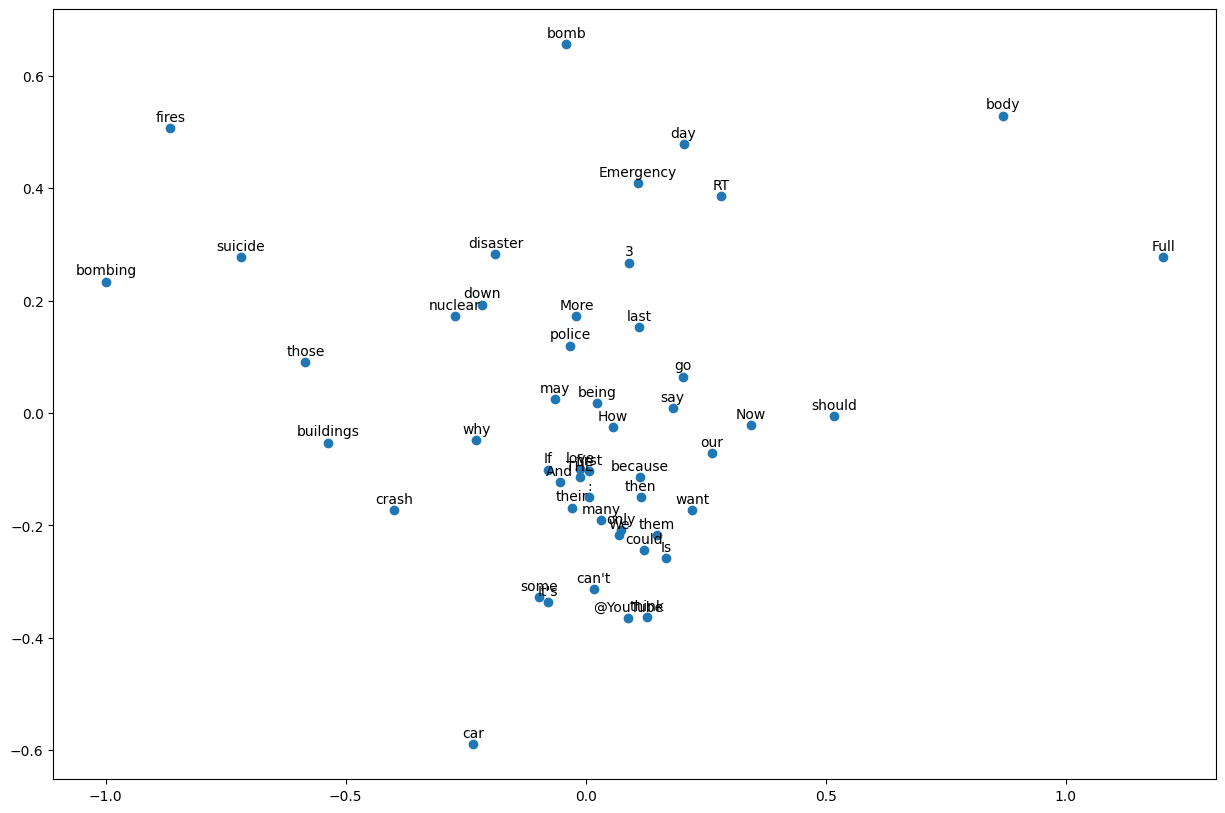

In [56]:
# Visualize word embeddings

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def visualize_embedings(words,tokinizer,embedder):
  """
  words: 1D of words as list or array
  tokinizer: vectorizer turning words into tokins
  embedder: turning tokins into embedding vectors
  """
  emb = words
  words = emb
  emb = embedder(tokinizer(emb)).numpy()
  emb = np.reshape(emb,(emb.shape[0],-1))

  pca = PCA(2)
  projected_emb = pca.fit_transform(emb)


  plt.figure(figsize=(15,10))
  plt.scatter(projected_emb.T[0],
              projected_emb.T[1])

  for i, word in enumerate(words):
      plt.annotate(word, (projected_emb[i, 0], projected_emb[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

  plt.show()

visualize_embedings(vocab[100:150]['word'],text_vectorizer,embedding)

In [57]:
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_2 (Embedding)     (None, 10, 128)           1280000   
                                                                 
 global_average_pooling1d_2  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_6 (Dense)             (None, 50)                6450      
                                                                 
 dense_7 (Dense)             (None, 50)                2550

### RNN (LSTM)


In [58]:
seq_length = 20

vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = 1000,output_sequence_length=seq_length)
vectorizer.adapt(X_train)

input = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = vectorizer(input)
x = tf.keras.layers.Embedding(input_dim = 1000,output_dim = 100,input_length = seq_length)(x)

x = tf.keras.layers.LSTM(64,return_sequences=True)(x) # return_sequenses so we allow to stack multiple RNNs layers
# x = tf.keras.layers.LSTM(64)(x)
x = tf.keras.layers.GlobalAvgPool1D()(x)
# x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_2 = tf.keras.models.Model(input,output)
model_2.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model_2.fit(X_train,y_train,epochs=1,validation_data=(X_test,y_test))

215/215 [==============================] - 10s 31ms/step - loss: 0.5407 - accuracy: 0.7306 - val_loss: 0.4859 - val_accuracy: 0.7730


In [59]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_3 (Text  (None, 20)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 20, 100)           100000    
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            42240     
                                                                 
 global_average_pooling1d_3  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_9 (Dense)             (None, 64)                4160

In [60]:
def model_result(model,X_test,y_test):
  predictions = model.predict(X_test,verbose=0)
  predictions = tf.reshape(predictions,(predictions.shape[0])).numpy()
  print(classification_report(y_test,np.round(predictions)))
  print(confusion_matrix(y_test,np.round(predictions)))

model_result(model_2,X_test,y_test)

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       414
           1       0.85      0.61      0.71       348

    accuracy                           0.77       762
   macro avg       0.79      0.76      0.76       762
weighted avg       0.79      0.77      0.77       762

[[378  36]
 [137 211]]


In [61]:
def model_tial(model,text):
  print("'",text,"' =>",' %',int(model.predict([text],verbose=0)[0][0]*100), 'chance to be disaster')

# Test being joking in the tweet

model_tial(model_2,'there is a flood in our street')
model_tial(model_2,'there is a flood in our street, haha kidding') # Still considered as disaster due to unidirected model
model_tial(model_2,'haha kidding, there is a flood in our street')

' there is a flood in our street ' =>  % 71 chance to be disaster
' there is a flood in our street, haha kidding ' =>  % 61 chance to be disaster
' haha kidding, there is a flood in our street ' =>  % 45 chance to be disaster


In [62]:
# Test the "not"

model_tial(model_2,'there is a flood in our street')
model_tial(model_2,'there is no flood in our street')

' there is a flood in our street ' =>  % 71 chance to be disaster
' there is no flood in our street ' =>  % 66 chance to be disaster


### RNN (GRU)

In [63]:
seq_length = 20

vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = 1000,output_sequence_length=seq_length)
vectorizer.adapt(X_train)

input = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = vectorizer(input)
x = tf.keras.layers.Embedding(input_dim = 1000,output_dim = 100,input_length = seq_length)(x)

x = tf.keras.layers.GRU(64,return_sequences=True)(x)
x = tf.keras.layers.GlobalAvgPool1D()(x)
# x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.models.Model(input,output)
model_3.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model_3.fit(X_train,y_train,epochs=1,validation_data=(X_test,y_test))

215/215 [==============================] - 10s 30ms/step - loss: 0.5330 - accuracy: 0.7275 - val_loss: 0.4848 - val_accuracy: 0.7559


In [64]:
model_result(model_3,X_test,y_test)

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       414
           1       0.83      0.58      0.69       348

    accuracy                           0.76       762
   macro avg       0.78      0.74      0.74       762
weighted avg       0.77      0.76      0.75       762

[[373  41]
 [145 203]]


In [65]:
# GRU fails to detect the joke !!
model_tial(model_3,'there is a flood in our street')
model_tial(model_3,'there is a flood in our street, haha kidding')
model_tial(model_3,'haha kidding, there is a flood in our street')

' there is a flood in our street ' =>  % 61 chance to be disaster
' there is a flood in our street, haha kidding ' =>  % 47 chance to be disaster
' haha kidding, there is a flood in our street ' =>  % 41 chance to be disaster


In [66]:
# Also failed to detect the negation

model_tial(model_3,'there is a flood in our street')
model_tial(model_3,'there is no flood in our street')

' there is a flood in our street ' =>  % 61 chance to be disaster
' there is no flood in our street ' =>  % 60 chance to be disaster


### RNN (Bidirectional)

In [67]:
seq_length = 20

vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = 1000,output_sequence_length=seq_length)
vectorizer.adapt(X_train)

input = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = vectorizer(input)
x = tf.keras.layers.Embedding(input_dim = 1000,output_dim = 100,input_length = seq_length)(x)

x = tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(64,return_sequences=True))(x)
x = tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(32))(x)


x = tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dense(32,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.models.Model(input,output)
model_4.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model_4.fit(X_train,y_train,epochs=1,validation_data=(X_test,y_test))

215/215 [==============================] - 25s 71ms/step - loss: 0.5279 - accuracy: 0.7332 - val_loss: 0.4761 - val_accuracy: 0.7730


In [68]:
model_result(model_4,X_test,y_test)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       414
           1       0.83      0.63      0.72       348

    accuracy                           0.77       762
   macro avg       0.79      0.76      0.76       762
weighted avg       0.78      0.77      0.77       762

[[370  44]
 [129 219]]


In [69]:
# Joke detect test
model_tial(model_4,'there is a flood in our street')
model_tial(model_4,'there is a flood in our street, haha kidding')
model_tial(model_4,'haha kidding, there is a flood in our street')

print('\n\n')
# Negation detect test

model_tial(model_4,'there is a flood in our street')
model_tial(model_4,'there is no flood in our street')

' there is a flood in our street ' =>  % 66 chance to be disaster
' there is a flood in our street, haha kidding ' =>  % 65 chance to be disaster
' haha kidding, there is a flood in our street ' =>  % 63 chance to be disaster



' there is a flood in our street ' =>  % 66 chance to be disaster
' there is no flood in our street ' =>  % 73 chance to be disaster


### CNN Conv1D

In [70]:
seq_length = 20

vectorizer = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens = 1000,output_sequence_length=seq_length)
vectorizer.adapt(X_train)

input = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = vectorizer(input)
x = tf.keras.layers.Embedding(input_dim = 1000,output_dim = 100,input_length = seq_length)(x)


x = tf.keras.layers.Conv1D(64,7,padding='same')(x)
x = tf.keras.layers.Conv1D(64,7,padding='same')(x)
x = tf.keras.layers.MaxPool1D()(x)
x = tf.keras.layers.Conv1D(64,7,padding='same')(x)
x = tf.keras.layers.Conv1D(64,7,padding='same')(x)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True))(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)

output = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.models.Model(input,output)
model_5.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model_5.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_6 (Text  (None, 20)                0         
 Vectorization)                                                  
                                                                 
 embedding_6 (Embedding)     (None, 20, 100)           100000    
                                                                 
 conv1d (Conv1D)             (None, 20, 64)            44864     
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 64)            28736     
                                                                 
 max_pooling1d (MaxPooling1  (None, 10, 64)            0         
 D)                                                        

In [71]:
model_5.fit(X_train,y_train,epochs=1,validation_data=(X_test,y_test))

215/215 [==============================] - 16s 41ms/step - loss: 0.5215 - accuracy: 0.7416 - val_loss: 0.4866 - val_accuracy: 0.7703


In [72]:
model_result(model_5,X_test,y_test)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       414
           1       0.84      0.62      0.71       348

    accuracy                           0.77       762
   macro avg       0.79      0.76      0.76       762
weighted avg       0.78      0.77      0.76       762

[[372  42]
 [133 215]]


In [73]:
# Joke detect test
model_tial(model_5,'there is a flood in our street')
model_tial(model_5,'there is a flood in our street, haha kidding')
model_tial(model_5,'haha kidding, there is a flood in our street')

print('\n\n')
# Negation detect test

model_tial(model_5,'there is a flood in our street')
model_tial(model_5,'there is no flood in our street')

' there is a flood in our street ' =>  % 59 chance to be disaster
' there is a flood in our street, haha kidding ' =>  % 47 chance to be disaster
' haha kidding, there is a flood in our street ' =>  % 47 chance to be disaster



' there is a flood in our street ' =>  % 59 chance to be disaster
' there is no flood in our street ' =>  % 66 chance to be disaster


### Pretrained Embeddings

In [74]:
import tensorflow_hub as hub
import tensorflow as tf

embed = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                       input_shape=[],
                       dtype=tf.string,
                       trainable = False)


In [78]:
seq_length = 20



model_6 = tf.keras.models.Sequential([
    embed,
    # tf.keras.layers.LSTM(64,return_sequences=True),
    # tf.keras.layers.GlobalAvgPool1D(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_6.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

model_6.summary()
model_6.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_22 (Dense)            (None, 64)                32832     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256832769 (979.74 MB)
Trainable params: 34945 (136.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________
Epoch 1/10
215/215 [==============================] - 14s 38ms/step - loss: 0.4894 - accuracy: 0.7884 - val_loss: 0.4462 - val_accuracy:

In [79]:
model_result(model_6,X_test,y_test)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       414
           1       0.86      0.71      0.78       348

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.81      0.81       762

[[372  42]
 [100 248]]


In [80]:
# Joke detect test
model_tial(model_6,'there is a flood in our street')
model_tial(model_6,'there is a flood in our street, haha kidding')
model_tial(model_6,'haha kidding, there is a flood in our street')

print('\n\n')
# Negation detect test

model_tial(model_6,'there is a flood in our street')
model_tial(model_6,'there is no flood in our street')

' there is a flood in our street ' =>  % 49 chance to be disaster
' there is a flood in our street, haha kidding ' =>  % 23 chance to be disaster
' haha kidding, there is a flood in our street ' =>  % 7 chance to be disaster



' there is a flood in our street ' =>  % 49 chance to be disaster
' there is no flood in our street ' =>  % 42 chance to be disaster


In [114]:
import os

model_6.save('my_model.keras')
print(f'File size: {os.path.getsize("my_model.keras") / (1024 * 1024):.2f} MB')

File size: 980.10 MB


In [115]:
model_6.predict(['help the city on fire'])

1/1 [==============================] - 0s 145ms/step


array([[0.70996684]], dtype=float32)